<h3>About this file</h3><br>
Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.).

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

Attribute Information:

<b>Class Values:</b>

unacc, acc, good, vgood

Attributes:

<b>buying:</b> vhigh, high, med, low.<br>
<b>maint:</b> vhigh, high, med, low.<br>
<b>doors:</b> 2, 3, 4, 5more.<br>
<b>persons:</b> 2, 4, more.<br>
<b>lug_boot:</b> small, med, big.<br>
<b>safety:</b> low, med, high.<br>

In [2]:
#import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import ML necessary package
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [4]:
#import evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
#import category encoders (for gini index)
import category_encoders as ce

In [6]:
#import dataset
df = pd.read_csv("car_evaluation.csv", sep = ",", header = None)

In [7]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
col_name = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_name

In [9]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
for col in df.columns:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [12]:
#separating target variable
x = df.iloc[:, 0:6]
y = df.iloc[:,6]

In [13]:
#split train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =  100, test_size = 0.3)

In [14]:
x_train.shape

(1209, 6)

<b>  If your target variable contains multiple non-numeric values, we need to convert it numerical value </b>

In [15]:
x_train.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [16]:
encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [17]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
774,1,1,1,1,1,1
1021,2,2,2,1,2,2
105,3,3,3,1,3,1
44,3,3,2,2,3,3
1374,4,3,4,1,3,1


<h3>Function to perform training with entropy</h3>

In [18]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [19]:
y_pred = clf_entropy.predict(x_train)

In [20]:
print("Accuracey score for train dataset : ", accuracy_score(y_train, y_pred))

Accuracey score for train dataset :  0.7750206782464847


In [21]:
y_pred_test = clf_entropy.predict(x_test)

In [22]:
print("Accuracey score for test dataset : ", accuracy_score(y_test, y_pred_test))

Accuracey score for test dataset :  0.7842003853564548


In [23]:
#Check for overfit and underfitting 
print("Train set score {:.4f}".format(clf_entropy.score(x_train, y_train)))
print("Test set score {:.4f}".format(clf_entropy.score(x_test, y_test)))

Train set score 0.7750
Test set score 0.7842


[Text(0.4, 0.875, 'x[5] <= 1.5\nentropy = 1.217\nsamples = 1209\nvalue = [274, 48, 840, 47]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 400\nvalue = [0, 0, 400, 0]'),
 Text(0.6, 0.625, 'x[3] <= 2.5\nentropy = 1.487\nsamples = 809\nvalue = [274, 48, 440, 47]'),
 Text(0.4, 0.375, 'x[0] <= 3.5\nentropy = 1.639\nsamples = 546\nvalue = [274, 48, 177, 47]'),
 Text(0.2, 0.125, 'entropy = 1.432\nsamples = 406\nvalue = [205, 19, 164, 18]'),
 Text(0.6, 0.125, 'entropy = 1.762\nsamples = 140\nvalue = [69, 29, 13, 29]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 263\nvalue = [0, 0, 263, 0]')]

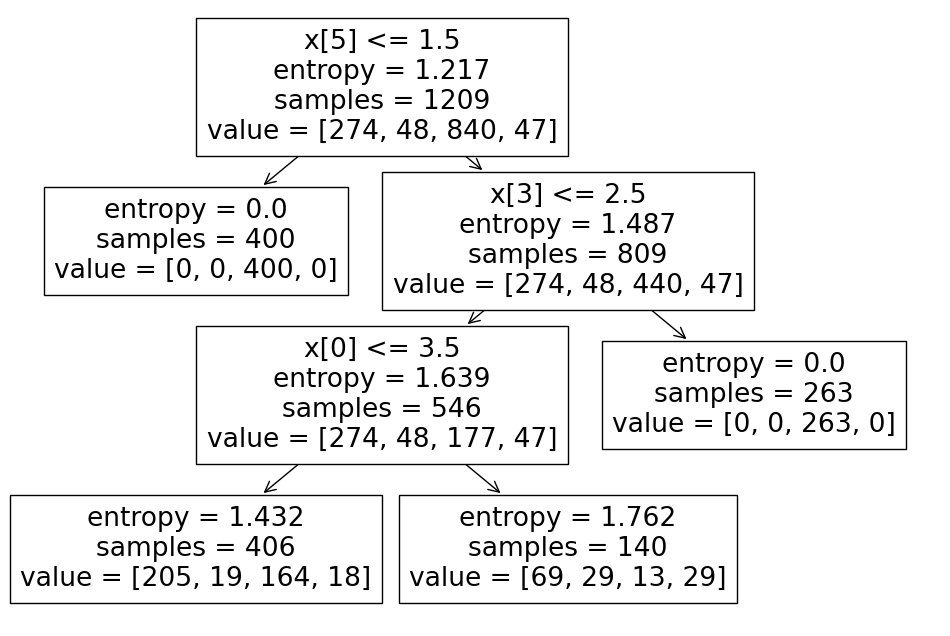

In [24]:
#Visualize decision-tree
plt.figure(figsize = (12,8))

tree.plot_tree(clf_entropy.fit(x_train, y_train))

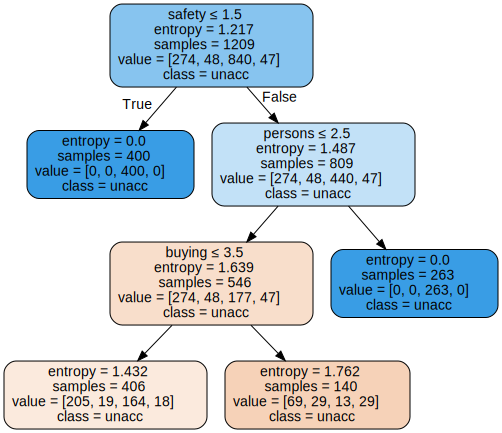

In [25]:
#visualize decision-tree with graphviz
import graphviz

dot_data = tree.export_graphviz(clf_entropy, out_file = None , feature_names = x_train.columns, \
                                class_names = y_train, filled = True, rounded = True , special_characters = True)

graph = graphviz.Source(dot_data)
graph

In [26]:
#Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

[[110   0   0   0]
 [ 21   0   0   0]
 [ 73   0 297   0]
 [ 18   0   0   0]]


In [27]:
#classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         acc       0.50      1.00      0.66       110
        good       0.00      0.00      0.00        21
       unacc       1.00      0.80      0.89       370
       vgood       0.00      0.00      0.00        18

    accuracy                           0.78       519
   macro avg       0.37      0.45      0.39       519
weighted avg       0.82      0.78      0.78       519



/home/omayed/my-jupyter-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/omayed/my-jupyter-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/omayed/my-jupyter-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3>Function to perform training with gini index</h3>

In [29]:
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 100)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=100)

In [31]:
#predict on train data
y_pred_train_gini = clf_gini.predict(x_train)

In [34]:
#Accuracy score for train data 
print("Accuracy Score : ", accuracy_score(y_train, y_pred_train_gini))

Accuracy Score :  0.7750206782464847


In [32]:
#predict on test data 
y_pred_gini = clf_gini.predict(x_test)

In [35]:
#Accuracy score for test data
print("Accuracy Score : ", accuracy_score(y_test, y_pred_gini))

Accuracy Score :  0.7842003853564548


In [36]:
#Check for overfit and underfit
print("Training set Score {:.4f}".format(clf_gini.score(x_train, y_train)))
print("Testing set Score {:.4f}".format(clf_gini.score(x_test, y_test)))

Training set Score 0.7750
Testing set Score 0.7842


[Text(0.4, 0.875, 'x[5] <= 1.5\ngini = 0.463\nsamples = 1209\nvalue = [274, 48, 840, 47]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 400\nvalue = [0, 0, 400, 0]'),
 Text(0.6, 0.625, 'x[3] <= 2.5\ngini = 0.583\nsamples = 809\nvalue = [274, 48, 440, 47]'),
 Text(0.4, 0.375, 'x[0] <= 3.5\ngini = 0.628\nsamples = 546\nvalue = [274, 48, 177, 47]'),
 Text(0.2, 0.125, 'gini = 0.578\nsamples = 406\nvalue = [205, 19, 164, 18]'),
 Text(0.6, 0.125, 'gini = 0.663\nsamples = 140\nvalue = [69, 29, 13, 29]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 263\nvalue = [0, 0, 263, 0]')]

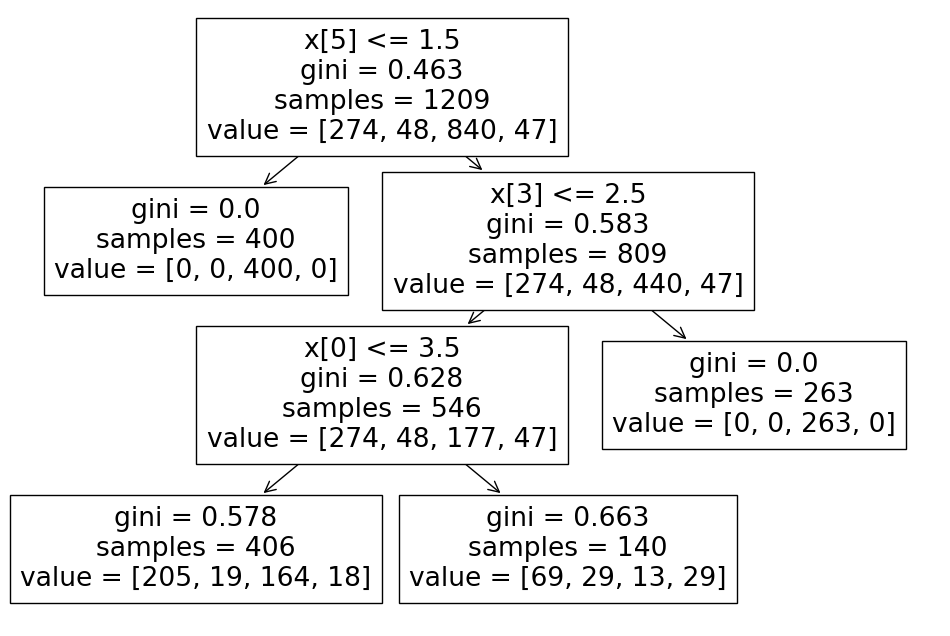

In [39]:
#Visualize decision tree
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(x_train,y_train))

In [40]:
#Visualize decision tree with graphviz
dot_data = tree.export_graphviz(clf_gini, out_file = None, feature_names = x_train.columns, \
                                class_names = y_train, filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)

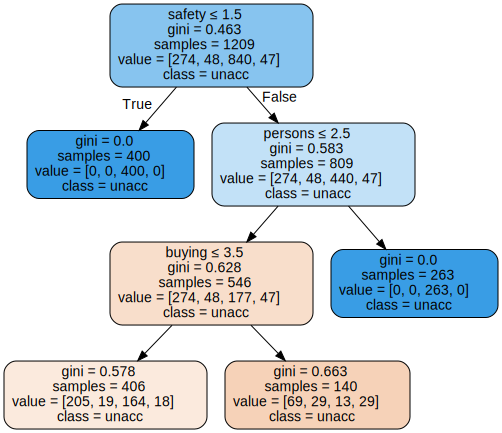

In [41]:
graph

In [42]:
#Confusion Matrix
print("confusion matrix :\n\n ",confusion_matrix(y_test, y_pred_gini) )

confusion matrix :

  [[110   0   0   0]
 [ 21   0   0   0]
 [ 73   0 297   0]
 [ 18   0   0   0]]


In [43]:
#Classification Report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         acc       0.50      1.00      0.66       110
        good       0.00      0.00      0.00        21
       unacc       1.00      0.80      0.89       370
       vgood       0.00      0.00      0.00        18

    accuracy                           0.78       519
   macro avg       0.37      0.45      0.39       519
weighted avg       0.82      0.78      0.78       519



/home/omayed/my-jupyter-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/omayed/my-jupyter-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/omayed/my-jupyter-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<b> The accuracy values for the training data and test data set are 78% for both the entropy and Gini methods... So, we can say that the Decision Tree method is perfectly fit for this data set.</b>